Step 1: Acquire the dataset

We got the data from this google drive link. https://drive.google.com/drive/folders/16BK8_d1V-A3M1WQ0neaeCwqrHPfzH7QS?usp=sharing . This link is provided from Wei Shen where he gotten it from Mr.Afiq, who is the founder of Chili Lado.

We decided not to use all the datasets in this google drive, however, we only selected the datasets that are relevant to our analysis. The selected the Product Overview datasets from the Product Folder. 

At first we downloaded all the dataset into our local drive by using the dowload all button.

![DownloadAll](ChiliLadoData/DownloadAll.png)

All the datasets is downloaded in this zipped file.

![ZippedFile](ChiliLadoData/ZippedFile.png)
![DownloadedFile](ChiliLadoData/DownloadedFile.png)

Based on our observation, the zip include the Product Overview dataset which is from May 2023 to September 2023. All of them has 22 Column, however it has different number of rows. May, June, July, August, September has 32,31,32,32,31 rows respectively. The column names are:
1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Items Visited
5. Product Bounce Visitors
6. Product Bounce Rate
7. Search Clicks
8. Likes
9. Product Visitors (Add to Cart)
10. Units (Add to Cart)
11. Conversion Rate (Add to Cart)
12. Buyers (Placed Order)
13. Units (Placed Order)
14. Items Placed
15. Sales (Placed Order)(MYR)
16. Conversion Rate (Placed Order)
17. Buyers (Confirmed Order)
18. Units (Confirmed Order)
19. Items Confirmed
20. Sales (Confiremd Order)(MYR)
21. Conversion Rate (Confirmed Order)
22. Converison Rate (Placed to Confirmed)

We first combine all the 5 files together, however we decided to do it with copy and paste instead of using python code because it only has 5 files. We use Ctrl+C to copy all the rows and use Ctrl+V to paste the copied rows into a new Excel File called MergedFile.xlsx.

![CopiedFile](ChiliLadoData/CopiedFile.png)

![PasteFile](ChiliLadoData/PasteFile.png)

We copied all five datasets into the MergedFile. However, for May 2023, we copy the whole file including the column names, while for other months,we only copied the data. We pasted the data beneath May 2023. We followed the same process for July 2023 and subsequent months.

![MayJune](ChiliLadoData/MayJune.png)

To check if the data is merged correctly, we calculate the total number of rows by adding the number of days in these 5 months and the row contains attribute name which is 31 + 30 + 31 + 31 + + 30 + 1 = 154, as our MergedFile has 154 rows means that we had merged it correctly.

Now the data can be used for the next few steps.


Step 2: Import the libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 3: Import the dataset

We import the dataset from our local directory. We created a file named ChiliLadoData and stored all the dataset and picture used there.

In [96]:
df = pd.read_excel('MergedFile.xlsx')

Step 4: Clean the data by dentifying and handling missing value, abnormality, outliers and redundancy

Initially, almost all the data in the Excel file was not numerical data.

![ConvertData](ChiliLadoData/ConvertData.png)

Therefore, we converted all the data in the dataset into numerical values by selecting the "Convert to Number" option in Excel to prevent potential errors. You can identify non-numeric data when the left upper corner of the cell is marked in green.

![Number](ChiliLadoData/Number.png)

If all the cells are white, it indicates that we have successfully converted the data into numerical values. Now, we can proceed with using Python for data preprocessing.

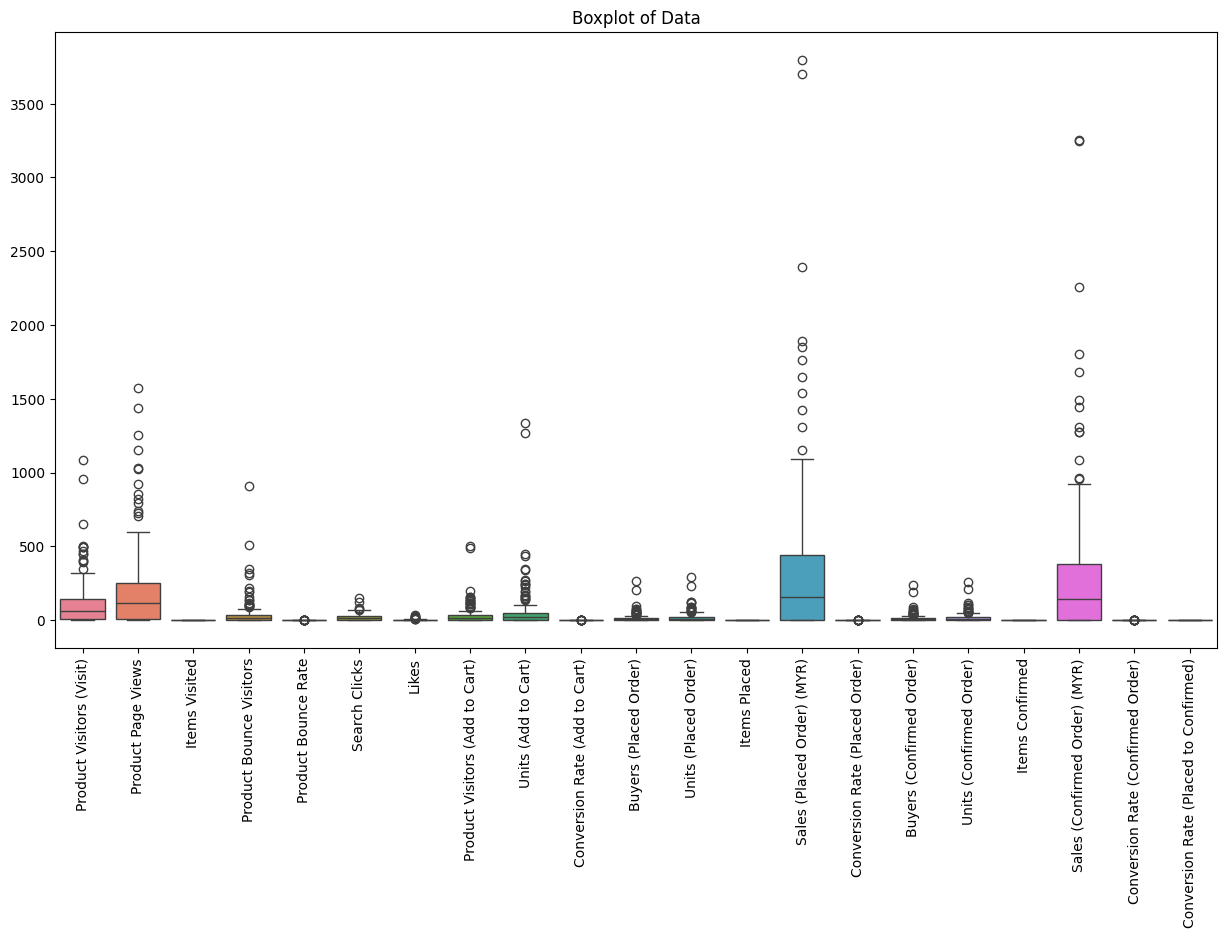

In [97]:
# Exclude the 'Date' column
outliersdf = df.drop(columns=['Date'])

# To check for outliers in the data
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf)
plt.title("Boxplot of Data")
plt.xticks(rotation=90)
plt.show()

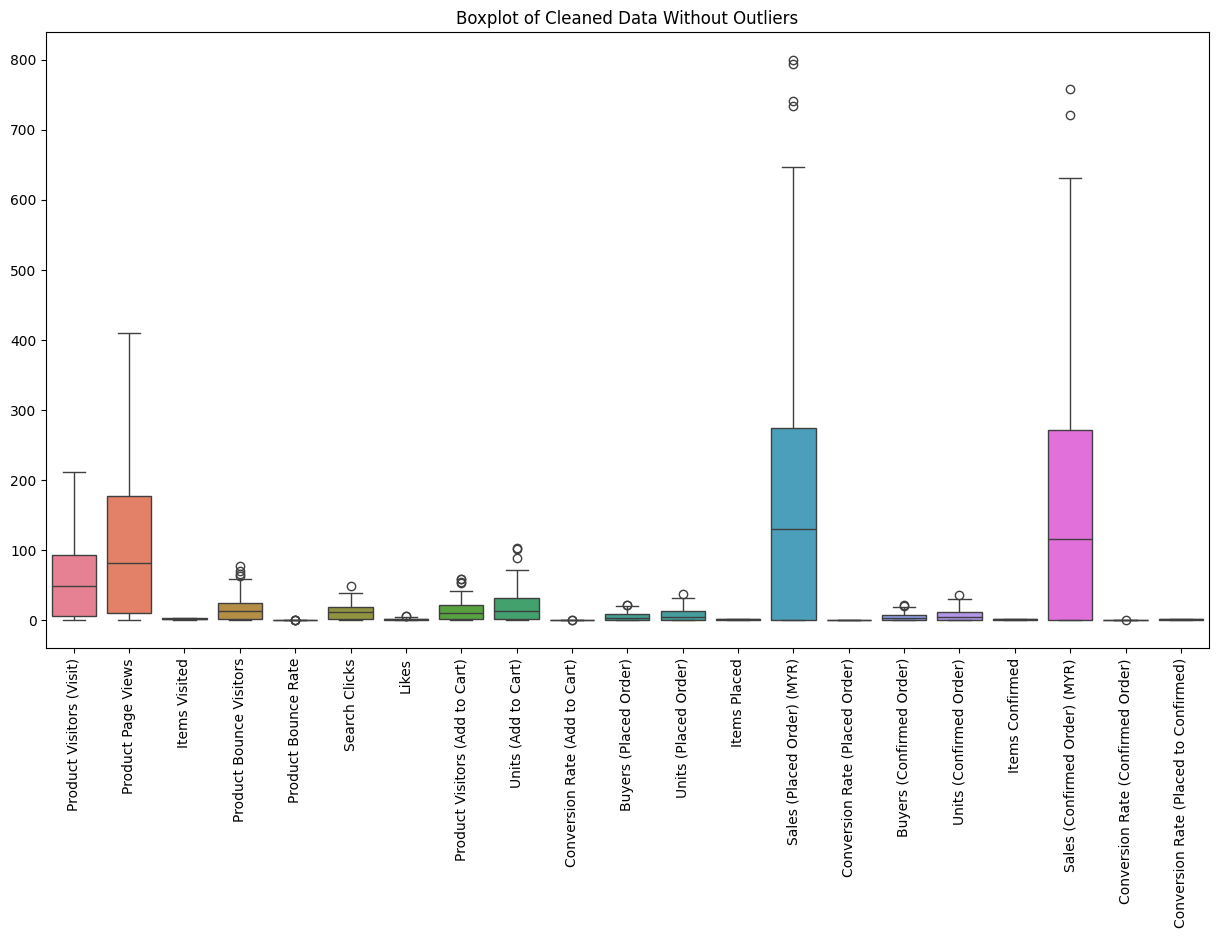

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Product Bounce Visitors,Product Bounce Rate,Search Clicks,Likes,Product Visitors (Add to Cart),Units (Add to Cart),...,Units (Placed Order),Items Placed,Sales (Placed Order) (MYR),Conversion Rate (Placed Order),Buyers (Confirmed Order),Units (Confirmed Order),Items Confirmed,Sales (Confirmed Order) (MYR),Conversion Rate (Confirmed Order),Conversion Rate (Placed to Confirmed)
2,2023-05-03,4,7,1,1,0.2500,3,0,1,1,...,0,0,0.00,0.0000,0,0,0,0.00,0.0000,0.0000
3,2023-05-04,1,3,1,0,0.0000,1,0,0,0,...,0,0,0.00,0.0000,0,0,0,0.00,0.0000,0.0000
4,2023-05-05,3,10,1,0,0.0000,2,0,1,1,...,0,0,0.00,0.0000,0,0,0,0.00,0.0000,0.0000
5,2023-05-06,4,4,1,1,0.2500,0,0,1,1,...,0,0,0.00,0.0000,0,0,0,0.00,0.0000,0.0000
6,2023-05-07,4,3,1,1,0.2500,2,0,0,0,...,0,0,0.00,0.0000,0,0,0,0.00,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-16,142,290,3,32,0.2254,49,0,53,63,...,5,1,137.45,0.0352,10,10,1,193.54,0.0704,2.0000
139,2023-09-17,66,131,3,14,0.2121,25,3,17,21,...,3,1,95.70,0.0455,5,5,1,112.70,0.0758,1.6667
140,2023-09-18,52,94,3,16,0.3077,17,0,8,8,...,2,1,63.77,0.0385,2,2,1,63.77,0.0385,1.0000
141,2023-09-19,94,190,3,19,0.2021,32,0,24,27,...,8,1,217.13,0.0745,7,8,1,217.13,0.0745,1.0000


In [98]:
# Calculate the first quartile (Q1), third quartile (Q3) and interquantile range (IQR)
Q1 = outliersdf.quantile(0.25, numeric_only=True)
Q3 = outliersdf.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Identify and filter the outliers using the IQR method
outlier_condition = ((outliersdf < (Q1 - 1.5 * IQR)) | (outliersdf > (Q3 + 1.5 * IQR))).any(axis=1)

# Dataframe with outliers are removed
df = df[~outlier_condition]

# Create a boxplot to visualize the cleaned DataFrame without outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Cleaned Data Without Outliers")
plt.xticks(rotation=90)
plt.show()

# Display the cleaned data
display(df)

In [99]:
df1 = df.copy()

# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Product Bounce Visitors', 'Product Bounce Rate','Likes', 'Product Visitors (Add to Cart)',
       'Units (Add to Cart)', 'Conversion Rate (Add to Cart)','Buyers (Placed Order)', 'Units (Placed Order)', 'Items Placed',
       'Sales (Placed Order) (MYR)', 'Conversion Rate (Placed Order)','Buyers (Confirmed Order)', 'Units (Confirmed Order)',
       'Items Confirmed','Conversion Rate (Confirmed Order)','Conversion Rate (Placed to Confirmed)']

df1.drop(columns=drop_columns, inplace=True)

display(df1)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR)
2,2023-05-03,4,7,1,3,0.00
3,2023-05-04,1,3,1,1,0.00
4,2023-05-05,3,10,1,2,0.00
5,2023-05-06,4,4,1,0,0.00
6,2023-05-07,4,3,1,2,0.00
...,...,...,...,...,...,...
138,2023-09-16,142,290,3,49,193.54
139,2023-09-17,66,131,3,25,112.70
140,2023-09-18,52,94,3,17,63.77
141,2023-09-19,94,190,3,32,217.13


jing yuan love little girls